In [12]:
!pip install transformers -q
!pip install --upgrade transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
#!pip install tokenizers

In [16]:
from transformers import BertModel, BertTokenizerFast

alephbert_tokenizer = BertTokenizerFast.from_pretrained('onlplab/alephbert-base')
alephbert = BertModel.from_pretrained('onlplab/alephbert-base')

Some weights of the model checkpoint at onlplab/alephbert-base were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [17]:
!pip install tea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
!pip install tensorflow
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import sys
import codecs
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [22]:
df = pd.read_csv('data_covid_main_raw_to_publish.csv')
df = df.drop('Unnamed: 0',axis = 1)
print(display(df.head()))

,emotion_id,emotion,emotion_en,talkbacks
0,3,"חשש, פחד",fear,הרופאה מטעה את הציבור: מי שנושא את הנגיף הוא...
1,3,"חשש, פחד",fear,"לסגור, כי אף אחד לא צריך להפגע מההפקרות במגזר..."
2,5,"עצב, צער",sadness,מתנגדי חיסונים מקבלים קשה מאוד את המחלה.\nממש...
3,7,"זעם, כעס",anger,אם לא הקורונה היו מתים מאות אנשים..\nהאיראנים...
4,0,"ציפייה, הבעת עניין",expectation,חייבים לתבוע את סין לרושש אותם.זה וירוס מהונד...


None


In [23]:
df['emotion'].value_counts()

סלידה, אי אמון        1137
חשש, פחד               437
ציפייה, הבעת עניין     400
עצב, צער               365
זעם, כעס               253
שמחה, התלהבות          120
הפתעה, תדהמה            64
הבעת אמון               49
Name: emotion, dtype: int64

<Axes: xlabel='emotion_en', ylabel='count'>

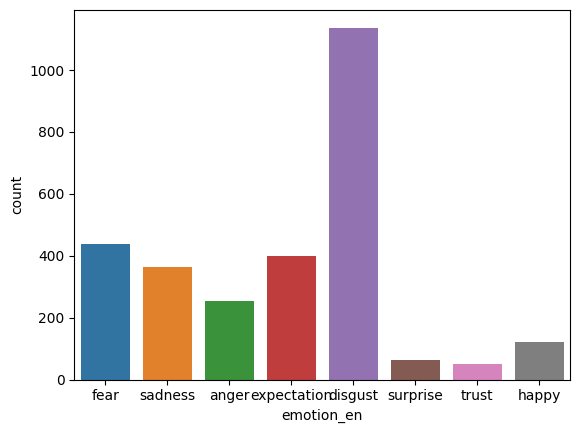

In [24]:
sns.countplot(x='emotion_en',data=df)

In [25]:
X = df.talkbacks
X = X.to_numpy()
Y = df.emotion_id
Y = Y.to_numpy()

In [26]:
train_tokens, test_tokens, train_tags , test_tags = train_test_split(X, Y, test_size = 0.2, random_state = 42)  

In [27]:
#conda install -c conda-forge jupyterlab

In [28]:
len(train_tokens)

2260

In [29]:
len(test_tokens)

565

In [30]:
tokens = np.append(train_tokens,test_tokens)
tokens_tags = np.append(train_tags,test_tags)
print(len(tokens))
len(tokens_tags)

2825


2825

In [31]:
token_lens = []

for txt in tokens:
    tok = alephbert_tokenizer.encode(txt, truncation=True)
    token_lens.append(len(tok))

In [32]:
token_lens

[20,
 39,
 29,
 61,
 53,
 81,
 90,
 58,
 55,
 37,
 47,
 70,
 31,
 52,
 49,
 46,
 43,
 30,
 10,
 38,
 55,
 36,
 39,
 30,
 60,
 38,
 64,
 51,
 55,
 15,
 14,
 33,
 45,
 22,
 46,
 15,
 67,
 44,
 47,
 93,
 62,
 29,
 97,
 66,
 69,
 35,
 80,
 34,
 74,
 22,
 86,
 51,
 83,
 62,
 49,
 53,
 66,
 63,
 82,
 55,
 59,
 20,
 11,
 117,
 33,
 33,
 31,
 38,
 44,
 49,
 123,
 110,
 47,
 18,
 55,
 56,
 38,
 94,
 38,
 39,
 33,
 34,
 68,
 6,
 52,
 31,
 39,
 15,
 58,
 54,
 30,
 17,
 52,
 51,
 39,
 29,
 37,
 65,
 33,
 28,
 38,
 14,
 28,
 106,
 27,
 39,
 30,
 44,
 9,
 39,
 36,
 27,
 82,
 69,
 62,
 34,
 54,
 41,
 48,
 47,
 56,
 68,
 32,
 36,
 52,
 35,
 38,
 41,
 29,
 21,
 28,
 43,
 34,
 61,
 9,
 52,
 52,
 61,
 35,
 60,
 36,
 32,
 59,
 68,
 44,
 31,
 20,
 24,
 36,
 9,
 30,
 54,
 21,
 52,
 48,
 37,
 66,
 49,
 40,
 56,
 31,
 86,
 51,
 70,
 42,
 111,
 34,
 77,
 56,
 44,
 47,
 64,
 23,
 31,
 97,
 50,
 18,
 37,
 59,
 32,
 58,
 31,
 57,
 71,
 24,
 52,
 42,
 41,
 46,
 29,
 47,
 29,
 41,
 81,
 50,
 39,
 31,
 75,
 11,
 30,

Text(0.5, 0, 'Token count')

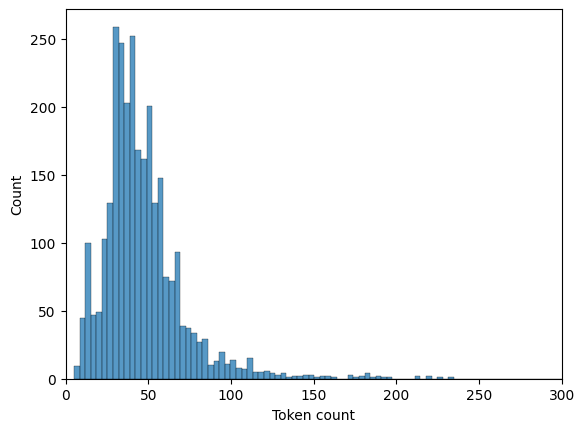

In [33]:
sns.histplot(token_lens)
plt.xlim([0, 300])
plt.xlabel('Token count')

In [34]:
import torch

In [35]:
torch.__version__

'2.0.0+cu118'

In [36]:
!pip install -q tb-nightly
%load_ext tensorboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 9.6 MB/s eta 0:00:00


In [37]:
import torch
from torch.utils.data import Dataset, DataLoader

In [38]:
class GPReviewDataset(Dataset):
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
    def __len__(self):
        return len(self.reviews)
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]
        encoding = self.tokenizer.encode_plus(review, add_special_tokens=True, max_length=self.max_len, return_token_type_ids=False, pad_to_max_length=True, return_attention_mask=True, return_tensors='pt',)
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

In [39]:
def create_data_loader(df,df_tags, tokenizer, max_len, batch_size):
    ds = GPReviewDataset(
        #reviews=df.to_numpy(),
        #targets=df_tags.to_numpy(),
        reviews=df,
        targets=df_tags,   
        tokenizer=tokenizer,
        max_len=max_len
      )
    return DataLoader(
        ds,
        batch_size=batch_size,
        #windows
        num_workers=0
        #colab
        #num_workers=4
      )

In [40]:
def loader(x_train, y_tags, x_test, y_test, MAX_LEN, BATCH_SIZE):
    train_data_loader = create_data_loader(x_train, y_tags, alephbert_tokenizer, MAX_LEN, BATCH_SIZE)
    val_data_loader = create_data_loader(x_test,y_test, alephbert_tokenizer, MAX_LEN, BATCH_SIZE)
    return train_data_loader, val_data_loader

In [41]:
def getmodel(class_names, device, classifier):
    model = classifier(len(class_names))
    model = model.to(device)
    return model

In [42]:
BATCH_SIZE = 16
MAX_LEN = 200
train_data_loader, val_data_loader = loader(train_tokens, train_tags,test_tokens,test_tags, MAX_LEN, BATCH_SIZE)
data = next(iter(train_data_loader))
data.keys()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [43]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([16, 200])
torch.Size([16, 200])
torch.Size([16])


In [44]:
alephbert.config.hidden_size

768

In [45]:
from torch import nn, optim
from collections import defaultdict
from sklearn.metrics import classification_report

In [46]:
class SentimentClassifier(nn.Module):
    def __init__(self, n_classes):
        super(SentimentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('onlplab/alephbert-base', return_dict=False)
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(input_ids=input_ids,attention_mask=attention_mask)
        output = self.drop(pooled_output)
        return self.out(output)

In [47]:
class EmotionClassifier(nn.Module):
    def __init__(self, n_classes):
        super(EmotionClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('onlplab/alephbert-base', return_dict=False)
        self.drop = nn.Dropout(p=0.3)
        self.out1 = nn.Linear(self.bert.config.hidden_size, 128)
        self.drop1 = nn.Dropout(p=0.3)
        self.relu = nn.ReLU()
        self.out = nn.Linear(128, n_classes)
    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(input_ids=input_ids,attention_mask=attention_mask)
        output = self.drop(pooled_output)
        output = self.out1(output)
        output = self.relu(output)
        output = self.drop1(output)
        return self.out(output)

In [48]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)
print(input_ids.shape)
print(attention_mask.shape)

torch.Size([16, 200])
torch.Size([16, 200])


In [49]:
class_names = df.emotion_en.unique()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = getmodel(class_names, device, SentimentClassifier)
torch.nn.functional.softmax(model(input_ids, attention_mask), dim=1)

Some weights of the model checkpoint at onlplab/alephbert-base were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[0.1067, 0.0704, 0.1011, 0.1958, 0.1287, 0.1446, 0.1365, 0.1162],
        [0.0986, 0.1011, 0.0773, 0.1654, 0.1372, 0.1253, 0.1804, 0.1147],
        [0.0780, 0.1023, 0.1236, 0.2226, 0.0987, 0.1401, 0.1266, 0.1080],
        [0.1141, 0.0946, 0.1173, 0.1843, 0.1388, 0.1293, 0.1230, 0.0986],
        [0.0978, 0.1126, 0.0971, 0.1513, 0.1411, 0.1976, 0.0953, 0.1072],
        [0.0872, 0.1128, 0.0865, 0.2019, 0.1630, 0.0973, 0.1230, 0.1283],
        [0.1011, 0.0808, 0.1247, 0.1744, 0.1027, 0.1523, 0.1269, 0.1371],
        [0.1083, 0.0819, 0.1222, 0.1951, 0.1113, 0.1459, 0.1249, 0.1105],
        [0.0823, 0.1025, 0.1222, 0.1906, 0.1259, 0.1423, 0.1137, 0.1204],
        [0.1158, 0.1213, 0.0945, 0.1596, 0.1766, 0.1395, 0.1067, 0.0861],
        [0.0828, 0.1026, 0.0923, 0.1858, 0.1826, 0.1393, 0.1113, 0.1034],
        [0.0904, 0.1016, 0.1113, 0.1596, 0.1633, 0.1666, 0.1142, 0.0930],
        [0.1091, 0.1195, 0.1232, 0.1998, 0.1517, 0.1095, 0.0789, 0.1082],
        [0.0876, 0.0896, 0.1033, 0.193

In [50]:
from transformers import AdamW, get_linear_schedule_with_warmup

In [51]:
def opsclo(model, train_data_loader,EPOCHS , device):
    optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
    total_steps = len(train_data_loader) * EPOCHS
    scheduler = get_linear_schedule_with_warmup(
      optimizer,
      num_warmup_steps=0,
      num_training_steps=total_steps
    )
    loss_fn = nn.CrossEntropyLoss().to(device)
    return optimizer, scheduler, loss_fn

In [52]:
def train_epoch(model, data_loader,  loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0
    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)
        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
    return correct_predictions.double() / n_examples, np.mean(losses)

In [53]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()
    losses = []
    correct_predictions = 0
    y_test = []
    y_pred = []
    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)
            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())
    return correct_predictions.double() / n_examples, np.mean(losses)

In [54]:
def train_model(EPOCHS,model,train_loader,val_loader, loss_fn,optimizer,device, scheduler,X_train, X_test ,nametomodel):
    history = defaultdict(list)
    best_accuracy = 0
    for epoch in range(EPOCHS):
        print(f'Epoch {epoch + 1}/{EPOCHS}')
        print('-' * 10)
        train_acc, train_loss = train_epoch(model, train_loader, loss_fn, optimizer, device, scheduler, len(X_train))
        print(f'Train loss {train_loss} accuracy {train_acc}')
        val_acc, val_loss = eval_model(model, val_loader, loss_fn, device, len(X_test))
        print(f'Val   loss {val_loss} accuracy {val_acc}')
        print()
        history['train_acc'].append(train_acc)
        history['train_loss'].append(train_loss)
        history['val_acc'].append(val_acc)
        history['val_loss'].append(val_loss)
        if val_acc > best_accuracy:
            torch.save(model.state_dict(), nametomodel)
            best_accuracy = val_acc
    return history

In [55]:
def class_name(df):
    class_n = df.copy()
    class_n = class_n[['emotion_en','emotion_id']]
    class_n = class_n.drop_duplicates()
    class_n = class_n.sort_values(by=['emotion_id'])
    class_n = class_n.emotion_en
    class_n.reset_index(drop=True, inplace=True)
    return class_n

In [ ]:
%%time

BATCH_SIZE = 16
MAX_LEN = 200
EPOCHS = 10
train_data_loader, val_data_loader = loader(train_tokens, train_tags,test_tokens,test_tags, MAX_LEN, BATCH_SIZE)
class_names = class_name(df)
print(class_names)
print(len(class_names))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = getmodel(class_names, device, SentimentClassifier)
optimizer, scheduler, loss_fn = opsclo(model, train_data_loader,EPOCHS , device)
nametomodel = 'best_model_state_emotion.bin'
history = train_model(EPOCHS,model,train_data_loader,val_data_loader, loss_fn,optimizer,device, scheduler,train_tokens, test_tokens,nametomodel)

0    expectation
1          happy
2          trust
3           fear
4       surprise
5        sadness
6        disgust
7          anger
Name: emotion_en, dtype: object
8


Some weights of the model checkpoint at onlplab/alephbert-base were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
C:\ProgramData\Anaconda3\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Us

Epoch 1/10
----------
Train loss 1.5436781821116594 accuracy 0.4491150442477876
Val   loss 1.4515441391203139 accuracy 0.47787610619469023

Epoch 2/10
----------
Train loss 1.2444002540178702 accuracy 0.5513274336283186
Val   loss 1.4946401748392317 accuracy 0.4654867256637168

Epoch 3/10
----------
Train loss 0.8199573939954731 accuracy 0.715929203539823
Val   loss 1.944955478111903 accuracy 0.4424778761061947

Epoch 4/10
----------
Train loss 0.4361514758685945 accuracy 0.8597345132743363
Val   loss 2.410287880235248 accuracy 0.3663716814159292

Epoch 5/10
----------
Train loss 0.23945273803940542 accuracy 0.9225663716814159
Val   loss 2.617000248697069 accuracy 0.40353982300884955

Epoch 6/10
----------
Train loss 0.12814163019172323 accuracy 0.9628318584070796
Val   loss 2.8749188317192926 accuracy 0.4194690265486726

Epoch 7/10
----------
Train loss 0.06902700494548542 accuracy 0.981858407079646
Val   loss 3.157883965306812 accuracy 0.4230088495575221

Epoch 8/10
----------
Train 

In [56]:
def plot(history):
    if history['train_acc'][0].device.__eq__('cuda:0'):
        train_acc = torch.tensor(history['train_acc']).cpu().numpy()
        val_acc = torch.tensor(history['val_acc']).cpu().numpy()
    else:
        train_acc = history['train_acc']
        val_acc = history['val_acc']    
    plt.plot(train_acc, label='train accuracy')
    plt.plot(val_acc, label='validation accuracy')
    plt.title('Training history')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.ylim([0, 1])    

C:\Users\Naors\AppData\Local\Temp/ipykernel_19872/2306657669.py:2: DeprecationWarning: NotImplemented should not be used in a boolean context
  if history['train_acc'][0].device.__eq__('cuda:0'):


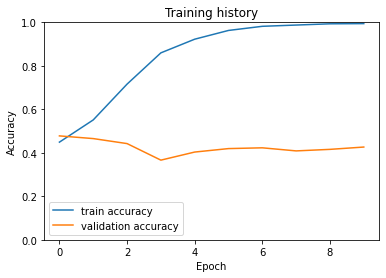

In [ ]:
plot(history)

In [ ]:
model.load_state_dict(torch.load(nametomodel))

<All keys matched successfully>

In [57]:
class_names = class_name(df)
print(class_names)

0    expectation
1          happy
2          trust
3           fear
4       surprise
5        sadness
6        disgust
7          anger
Name: emotion_en, dtype: object


In [ ]:
def get_emotion_line(text,model,MAX_LEN,class_name):
    encoded_review = alephbert_tokenizer.encode_plus(
        text,
        max_length=MAX_LEN,
        add_special_tokens=True,
        return_token_type_ids=False,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt',
    )
    input_ids = encoded_review['input_ids'].to(device)
    attention_mask = encoded_review['attention_mask'].to(device)
    output = model(input_ids, attention_mask)
    _, prediction = torch.max(output, dim=1)
    print(f'Review text: {text}')
    if prediction.device.__eq__('cuda:0'):
        pre = torch.tensor(prediction).cpu().numpy()
        print(f'Emotion  : {class_name[pre]}')
    else:
        print(f'Emotion  : {class_name[prediction]}')
text = "אני חושש "
get_emotion_line(text, model, MAX_LEN, class_names)

Review text: אני חושש 
Emotion  : 6    disgust
Name: emotion_en, dtype: object


C:\Users\Naors\AppData\Local\Temp/ipykernel_19872/605762713.py:16: DeprecationWarning: NotImplemented should not be used in a boolean context
  if prediction.device.__eq__('cuda:0'):
C:\Users\Naors\AppData\Local\Temp/ipykernel_19872/605762713.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pre = torch.tensor(prediction).cpu().numpy()


In [58]:
df_insample = pd.read_csv('data_test_insample_tagged_raw_to_publish.csv')
df_insample = df_insample.drop('Unnamed: 0',axis = 1)
print(display(df_insample.head()))

,emotion_id,emotion,emotion_en,talkbacks
0,0,"ציפייה, הבעת עניין",expectation,כמה ישראלים צריך בכדי להחליף נורה? לא נתתם לה ...
1,0,"ציפייה, הבעת עניין",expectation,הכל השני היה צריך להגיע מזמן הכל שקרים
2,3,"חשש, פחד",fear,אתה הגרוע ביותר! . קורא למטופלי קנאביס סוחרי ...
3,6,"סלידה, אי אמון",disgust,ורהמ עבר על חוק המתנות אם אם לו מותר
4,0,"ציפייה, הבעת עניין",expectation,החלמה מהירהאיש יקר האופטימיות והשימחה תביא לרפ...


None


In [59]:
X_test_insample = df_insample.talkbacks
X_test_insample = X_test_insample.to_numpy()
Y_test_insample = df_insample.emotion_id
Y_test_insample = Y_test_insample.to_numpy()

In [60]:
test_data_loader_insample = create_data_loader(X_test_insample,Y_test_insample, alephbert_tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
test_insample_acc, test_insample_loss = eval_model(model, test_data_loader_insample, loss_fn, device, len(X_test_insample))

C:\ProgramData\Anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
print(f'test insample loss {test_insample_loss} accuracy {test_insample_acc}')

test insample loss 2.095965944487473 accuracy 0.2885032537960954


In [61]:
def get_predictions(model, data_loader):
    model = model.eval()
    review_texts = []
    predictions = []
    prediction_probs = []
    real_values = []
    with torch.no_grad():
        for d in data_loader:
            texts = d["review_text"]
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)
            outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
            )
            _, preds = torch.max(outputs, dim=1)
            review_texts.extend(texts)
            predictions.extend(preds)
            prediction_probs.extend(outputs)
            real_values.extend(targets)
    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()
    return review_texts, predictions, prediction_probs, real_values

In [ ]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(model,test_data_loader_insample)
print('\nClassification Report test insample:\n\n',classification_report(y_test, y_pred, target_names=class_names))


Classification Report test insample:

               precision    recall  f1-score   support

 expectation       0.81      0.19      0.31       175
       happy       0.00      0.00      0.00         3
       trust       0.00      0.00      0.00         2
        fear       0.00      0.00      0.00       103
    surprise       0.00      0.00      0.00        18
     sadness       0.00      0.00      0.00        53
     disgust       0.24      0.97      0.38       102
       anger       0.00      0.00      0.00         5

    accuracy                           0.29       461
   macro avg       0.13      0.15      0.09       461
weighted avg       0.36      0.29      0.20       461



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#model.load_state_dict(torch.load(nametomodel))

In [62]:
df_outsample = pd.read_csv('data_test_outsample_tagged_raw_to_publish.csv')
df_outsample = df_outsample.drop('Unnamed: 0',axis = 1)
print(display(df_outsample.head()))

,emotion_id,emotion,emotion_en,talkbacks
0,1,"שמחה, התלהבות",happy,All the power to you . אנחנו מאמינים בך וסומכ...
1,3,"חשש, פחד",fear,"ככה נראת תחילתה של האנרכיה, תחי מדינת ישראל"
2,2,הבעת אמון,trust,"כל הכבוד, בבחירות הקול שלי עם בנט"
3,0,"ציפייה, הבעת עניין",expectation,כל הכבוד המשך כך בעשייה חיובית
4,6,"סלידה, אי אמון",disgust,בנט אם ביבי תתן לך לטיפה תחזור אליו כמו פודל


None


In [63]:
X_test_outsample = df_outsample.talkbacks
X_test_outsample = X_test_outsample.to_numpy()
Y_test_outsample = df_outsample.emotion_id
Y_test_outsample = Y_test_outsample.to_numpy()

In [64]:
test_data_loader_outsample = create_data_loader(X_test_outsample,Y_test_outsample, alephbert_tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
test_outsample_acc, test_outsample_loss = eval_model(model, test_data_loader_outsample, loss_fn, device, len(X_test_outsample))

C:\ProgramData\Anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
print(f'test outsample loss {test_outsample_loss} accuracy {test_outsample_acc}')

test outsample loss 1.097013337271554 accuracy 0.7083333333333333


In [ ]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(model,test_data_loader_outsample)
print('\nClassification Report test outsample:\n\n',classification_report(y_test, y_pred, target_names=class_names))


Classification Report test outsample:

               precision    recall  f1-score   support

 expectation       0.47      0.82      0.60        17
       happy       0.00      0.00      0.00         6
       trust       0.00      0.00      0.00        10
        fear       0.00      0.00      0.00         4
    surprise       0.00      0.00      0.00         1
     sadness       0.00      0.00      0.00        14
     disgust       0.75      0.96      0.84       145
       anger       0.00      0.00      0.00        19

    accuracy                           0.71       216
   macro avg       0.15      0.22      0.18       216
weighted avg       0.54      0.71      0.61       216



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0    expectation
1          happy
2          trust
3           fear
4       surprise
5        sadness
6        disgust
7          anger
Name: emotion_en, dtype: object
8


Some weights of the model checkpoint at onlplab/alephbert-base were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
C:\ProgramData\Anaconda3\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Us

Epoch 1/10
----------
Train loss 1.5977711014344658 accuracy 0.4570796460176991
Val   loss 1.4661350316471524 accuracy 0.47079646017699117

Epoch 2/10
----------
Train loss 1.4094383162511905 accuracy 0.5070796460176991
Val   loss 1.489002502626843 accuracy 0.47787610619469023

Epoch 3/10
----------
Train loss 1.2284097637928708 accuracy 0.5849557522123894
Val   loss 1.5862598286734686 accuracy 0.479646017699115

Epoch 4/10
----------
Train loss 0.9945144714184211 accuracy 0.665929203539823
Val   loss 1.6926106578773923 accuracy 0.44955752212389377

Epoch 5/10
----------
Train loss 0.7512874221298057 accuracy 0.7716814159292036
Val   loss 1.8299531009462144 accuracy 0.39292035398230085

Epoch 6/10
----------
Train loss 0.5854993097379174 accuracy 0.8336283185840708
Val   loss 1.9608451856507196 accuracy 0.3858407079646018

Epoch 7/10
----------
Train loss 0.42802383414876294 accuracy 0.8805309734513275
Val   loss 2.086011896530787 accuracy 0.415929203539823

Epoch 8/10
----------
Train

C:\Users\Naors\AppData\Local\Temp/ipykernel_11708/2306657669.py:2: DeprecationWarning: NotImplemented should not be used in a boolean context
  if history['train_acc'][0].device.__eq__('cuda:0'):


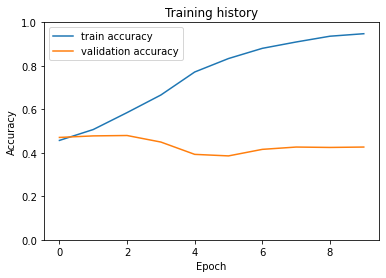

In [ ]:
%%time

BATCH_SIZE = 16
MAX_LEN = 200
EPOCHS = 10
train_data_loader, val_data_loader = loader(train_tokens, train_tags,test_tokens,test_tags, MAX_LEN, BATCH_SIZE)
class_names = class_name(df)
print(class_names)
print(len(class_names))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_E = getmodel(class_names, device, EmotionClassifier)
optimizer, scheduler, loss_fn = opsclo(model_E, train_data_loader,EPOCHS , device)
nametomodel = 'best_model_E_state_emotion.bin'
history = train_model(EPOCHS,model_E,train_data_loader,val_data_loader, loss_fn,optimizer,device, scheduler,train_tokens, test_tokens,nametomodel)
plot(history)

In [ ]:
model_E.load_state_dict(torch.load(nametomodel))
test_insample_acc, test_insample_loss = eval_model(model_E, test_data_loader_insample, loss_fn, device, len(X_test_insample))
print(f'test insample loss {test_insample_loss} accuracy {test_insample_acc}')
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(model_E,test_data_loader_insample)
print('\nClassification Report test insample:\n\n',classification_report(y_test, y_pred, target_names=class_names))
test_outsample_acc, test_outsample_loss = eval_model(model_E, test_data_loader_outsample, loss_fn, device, len(X_test_outsample))
print(f'test outsample loss {test_outsample_loss} accuracy {test_outsample_acc}')
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(model_E,test_data_loader_outsample)
print('\nClassification Report test outsample:\n\n',classification_report(y_test, y_pred, target_names=class_names))

C:\ProgramData\Anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


test insample loss 2.310031697667878 accuracy 0.32537960954446854


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\transformers


Classification Report test insample:

               precision    recall  f1-score   support

 expectation       0.66      0.33      0.44       175
       happy       0.00      0.00      0.00         3
       trust       0.00      0.00      0.00         2
        fear       0.28      0.12      0.16       103
    surprise       0.00      0.00      0.00        18
     sadness       0.15      0.04      0.06        53
     disgust       0.25      0.76      0.37       102
       anger       0.00      0.00      0.00         5

    accuracy                           0.33       461
   macro avg       0.17      0.16      0.13       461
weighted avg       0.38      0.33      0.29       461

test outsample loss 1.2148158018078123 accuracy 0.662037037037037

Classification Report test outsample:

               precision    recall  f1-score   support

 expectation       0.29      0.71      0.41        17
       happy       0.00      0.00      0.00         6
       trust       0.00      0.00      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!pip -V

#import tensorflow as tf

pip 21.2.4 from C:\ProgramData\Anaconda3\lib\site-packages\pip (python 3.9)



In [65]:

#from tensorflow import keras

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV
#from keras.models import Sequential
#from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.svm import LinearSVC

In [66]:
def conf_matrix(y, y_pred, labels, title):
    fig, ax =plt.subplots(figsize=(10,10))
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":15})
    ax.xaxis.set_ticklabels(labels, fontsize=10) 
    ax.yaxis.set_ticklabels(labels, fontsize=10)
    plt.title(title, fontsize=20)
    ax.set_ylabel('Test', fontsize=12)
    ax.set_xlabel('Predicted', fontsize=12)
    plt.show()

In [67]:
def LR(x_train, x_test, y_train, y_test, labels, test_insample,Y_test_insample, test_outsample, Y_test_outsample):
    params = {'penalty': ['l1', 'l2'],
              'solver' : ['newton-cg','saga'],
              'C': [0.001, 0.1, 1],}
    lr = LogisticRegression()
    grid = GridSearchCV(lr, param_grid=params, cv=4)      
    grid.fit(x_train, y_train)
    y_pred = grid.predict(x_test)
    accuracy_train = grid.score(x_train, y_train)
    accuracy_test = grid.score(x_test, y_test)
    print("Logistic Regression")
    print('Accuracy on train: {:.2f}%'.format(accuracy_train*100))
    print('Accuracy on test: {:.2f}%'.format(accuracy_test*100))
    print('\nClassification Report LogisticRegression:\n\n',classification_report(y_test , y_pred, target_names=[str(l) for l in labels]))
    print(conf_matrix(y_test, y_pred, labels, 'Confusion Matrix LogisticRegression'))
    y_pred_insample = grid.predict(test_insample)
    print('\ntest_insample Classification Report LogisticRegression:\n\n',classification_report(Y_test_insample , y_pred_insample, target_names=[str(l) for l in labels]))
    y_pred_outsample = grid.predict(test_outsample)
    print('\test_outsample Classification Report LogisticRegression:\n\n',classification_report(Y_test_outsample , y_pred_outsample, target_names=[str(l) for l in labels]))

    return grid.best_params_, grid

In [68]:
import re
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error

Logistic Regression
Accuracy on train: 59.73%
Accuracy on test: 45.31%

Classification Report LogisticRegression:

               precision    recall  f1-score   support

           0       0.56      0.43      0.49        81
           1       0.33      0.14      0.20        21
           2       0.00      0.00      0.00         8
           3       0.40      0.11      0.17       109
           4       0.00      0.00      0.00         6
           5       0.38      0.09      0.14        70
           6       0.45      0.90      0.60       222
           7       0.00      0.00      0.00        48

    accuracy                           0.45       565
   macro avg       0.26      0.21      0.20       565
weighted avg       0.39      0.45      0.36       565



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


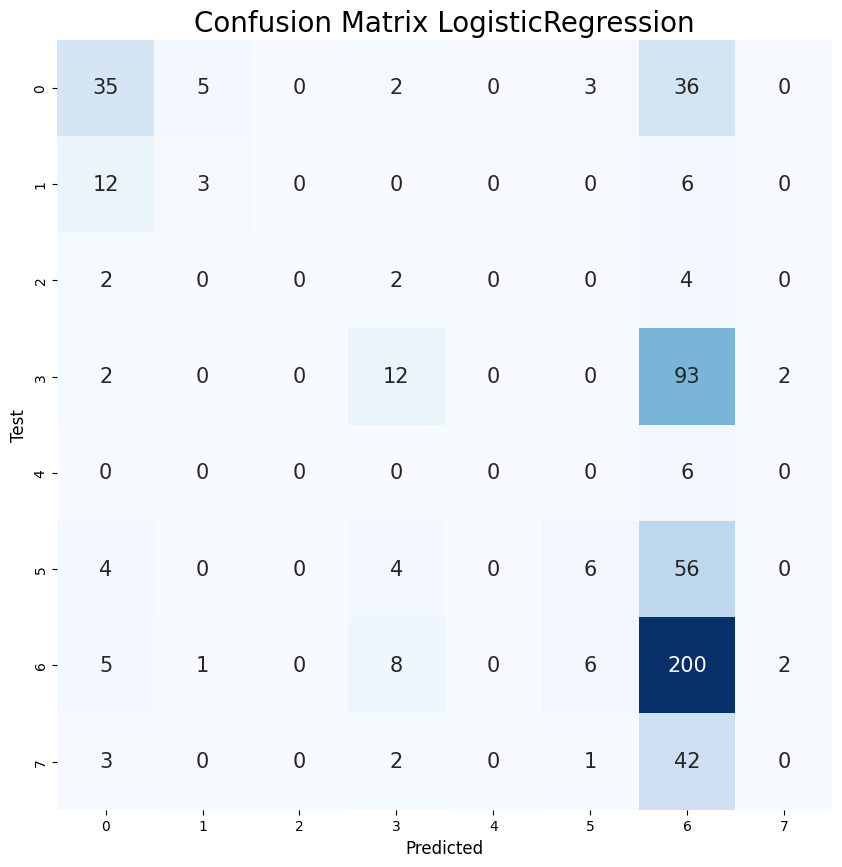

None

test_insample Classification Report LogisticRegression:

               precision    recall  f1-score   support

           0       0.68      0.15      0.24       175
           1       0.50      0.33      0.40         3
           2       0.00      0.00      0.00         2
           3       0.32      0.06      0.10       103
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00        53
           6       0.23      0.89      0.37       102
           7       0.00      0.00      0.00         5

    accuracy                           0.27       461
   macro avg       0.22      0.18      0.14       461
weighted avg       0.38      0.27      0.20       461

	est_outsample Classification Report LogisticRegression:

               precision    recall  f1-score   support

           0       0.06      0.06      0.06        17
           1       0.11      0.17      0.13         6
           2       0.00      0.00      0.00        10
         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [69]:
labels = np.unique(Y)
tf = TfidfVectorizer(analyzer='word', max_features=1000, ngram_range=(1,3))
train_tokens1 = tf.fit_transform(train_tokens).toarray()
test_tokens1 = tf.transform(test_tokens).toarray()

test_insample = tf.transform(X_test_insample).toarray()
test_outsample = tf.transform(X_test_outsample).toarray()


best_param, grid= LR(train_tokens1, test_tokens1, train_tags, test_tags, labels, test_insample,Y_test_insample, test_outsample, Y_test_outsample)
print('Best parametrs: ', best_param)

In [70]:
def RFCSVC(x_train, x_test, y_train, y_test, labels, test_insample,Y_test_insample, test_outsample, Y_test_outsample):
    estimators = [
      ('rf', RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=10, max_depth=4, max_features='log2')),
      ('svr', LinearSVC(dual=False, random_state=42))
      ]
    clf_stck = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(penalty='l2', C=1))
    clf_stck.fit(x_train, y_train)
    y_pred = clf_stck.predict(x_test)
    accuracy_train = clf_stck.score(x_train, y_train)
    accuracy_test = clf_stck.score(x_test, y_test)
    print("Random Forest and SVC")
    print('Accuracy on train: {:.2f}%'.format(accuracy_train*100))
    print('Accuracy on test: {:.2f}%'.format(accuracy_test*100))
    print('\nClassification Report RFC SVC:\n\n',classification_report(y_test , y_pred, target_names=[str(l) for l in labels]))
    print(conf_matrix(y_test, y_pred, labels, 'Confusion Matrix RFC Random Forest and SVC'))
    y_pred_insample = grid.predict(test_insample)
    print('\ntest_insample Classification Report RFC SVC:\n\n',classification_report(Y_test_insample , y_pred_insample, target_names=[str(l) for l in labels]))
    y_pred_outsample = grid.predict(test_outsample)
    print('\test_outsample Classification Report RFC SVC:\n\n',classification_report(Y_test_outsample , y_pred_outsample, target_names=[str(l) for l in labels]))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Random Forest and SVC
Accuracy on train: 53.10%
Accuracy on test: 44.25%

Classification Report RFC SVC:

               precision    recall  f1-score   support

           0       0.47      0.44      0.46        81
           1       0.42      0.24      0.30        21
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00       109
           4       0.00      0.00      0.00         6
           5       0.50      0.01      0.03        70
           6       0.44      0.94      0.60       222
           7       0.00      0.00      0.00        48

    accuracy                           0.44       565
   macro avg       0.23      0.20      0.17       565
weighted avg       0.32      0.44      0.32       565



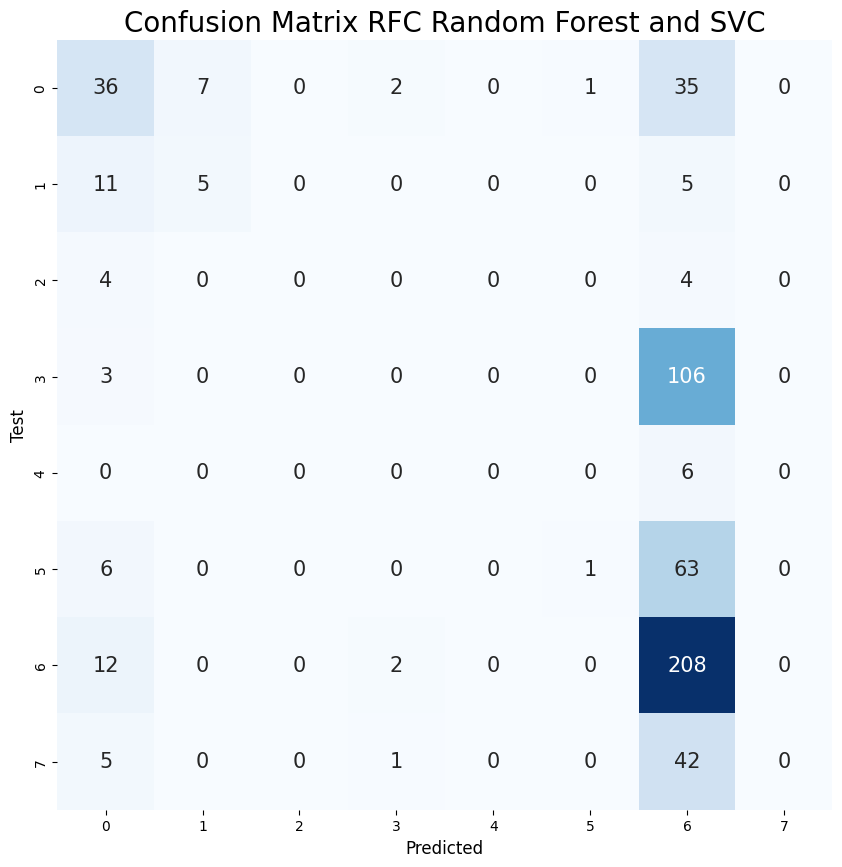

None

test_insample Classification Report RFC SVC:

               precision    recall  f1-score   support

           0       0.68      0.15      0.24       175
           1       0.50      0.33      0.40         3
           2       0.00      0.00      0.00         2
           3       0.32      0.06      0.10       103
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00        53
           6       0.23      0.89      0.37       102
           7       0.00      0.00      0.00         5

    accuracy                           0.27       461
   macro avg       0.22      0.18      0.14       461
weighted avg       0.38      0.27      0.20       461

	est_outsample Classification Report RFC SVC:

               precision    recall  f1-score   support

           0       0.06      0.06      0.06        17
           1       0.11      0.17      0.13         6
           2       0.00      0.00      0.00        10
           3       0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [71]:
RFCSVC(train_tokens1, test_tokens1, train_tags, test_tags, labels, test_insample,Y_test_insample, test_outsample, Y_test_outsample)

In [72]:
def getstopword():
    dfST = pd.read_csv('HE_stopword.csv',encoding=('ISO-8859-8'))
    return dfST.to_numpy()
def clean_content(text):
    #remove links http:// or https://, links beginning with www. and ending with .com, remove special characters
    text = text.replace('\n', ' ').replace('\xa0', ' ').replace('\u200a', ' ').replace('  ', ' ').strip()
    clean_text = re.sub(r'@\w+\s?', '', text)
    clean_text = re.sub(r'https?:\/\/\S+', '', clean_text)
    clean_text = re.sub(r'www\.[a-z]?\.?(com)+|[a-z]+\.(com)', '', clean_text)
    clean_text = re.sub(r'[^ \w+]', '', clean_text)
    clean_text = clean_text.split()
    # remove stop words
    clean_lst = []
    for word in clean_text:
        if word not in stop_words:
            clean_lst.append(word)
    lemmatized_words = []
    for word in clean_lst:
        lemmatized_word = WordNetLemmatizer().lemmatize(word)
        lemmatized_words.append(lemmatized_word)
    return ' '.join(lemmatized_words)

In [73]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [74]:
stop_words = getstopword()
df_clean = df.copy()
df_clean['talkbacks'] = df_clean['talkbacks'].apply(lambda x :  clean_content(x))
# delete duplicates
#df_clean.drop_duplicates(subset='talkbacks', inplace=True)
#df_clean.reset_index(drop=True, inplace=True)

df_clean.info()
df_clean.head()
#print(df_clean['talkbacks'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2825 entries, 0 to 2824
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   emotion_id  2825 non-null   int64 
 1   emotion     2825 non-null   object
 2   emotion_en  2825 non-null   object
 3   talkbacks   2825 non-null   object
dtypes: int64(1), object(3)
memory usage: 88.4+ KB


,emotion_id,emotion,emotion_en,talkbacks
0,3,"חשש, פחד",fear,הרופאה מטעה הציבור שנושא הנגיף חולה מחזירה ישב...
1,3,"חשש, פחד",fear,לסגור להפגע מההפקרות במגזר החרדי
2,5,"עצב, צער",sadness,מתנגדי חיסונים מקבלים המחלה חבל עצוב לבעלה ולי...
3,7,"זעם, כעס",anger,הקורונה מתים מאות האיראנים יוצאים פיזית ונפשית...
4,0,"ציפייה, הבעת עניין",expectation,חייבים לתבוע סין לרושש אותםזה וירוס מהונדס הסי...


In [75]:
# Splitting the dataset into training and testing sets
def split_data(tf, x,y):
    # split data on train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)
    # convert text to vectors with TF-IDF
    x_train = tf.fit_transform(x_train).toarray()
    x_test = tf.transform(x_test).toarray()
    return x_train, x_test, y_train, y_test

In [76]:
def co_data(df, bool):
    train = df.copy()
    x = np.array(train['talkbacks'].values)
    y = np.array(train['emotion_en'].values)

    # convert categorical to numeric
    encoder = preprocessing.LabelEncoder()
    y = encoder.fit_transform(y)
    labels = np.unique(encoder.inverse_transform(y))
    tf = TfidfVectorizer(analyzer='word', max_features=1000, ngram_range=(1,3))
    if bool:
        x_train, x_test, y_train, y_test = split_data(tf, x,y)
        return x_train, x_test, y_train, y_test, labels
    else:
        x = tf.fit_transform(x).toarray()
        return x, y, labels 

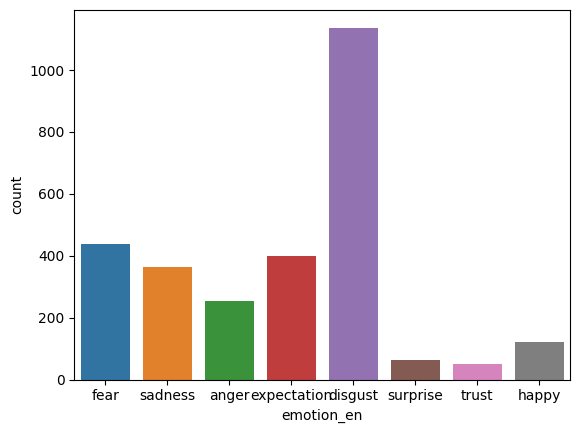

In [77]:
df_train = df_clean.copy()
sns.countplot(x='emotion_en',data=df_train)
x_train, x_test, y_train, y_test, labels = co_data(df_train, True)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver,

Logistic Regression
Accuracy on train: 59.29%
Accuracy on test: 44.42%

Classification Report LogisticRegression:

               precision    recall  f1-score   support

       anger       0.00      0.00      0.00        51
     disgust       0.45      0.88      0.59       227
 expectation       0.50      0.36      0.42        80
        fear       0.38      0.18      0.25        87
       happy       0.50      0.04      0.08        24
     sadness       0.35      0.08      0.13        73
    surprise       0.00      0.00      0.00        13
       trust       0.00      0.00      0.00        10

    accuracy                           0.44       565
   macro avg       0.27      0.19      0.18       565
weighted avg       0.38      0.44      0.36       565



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


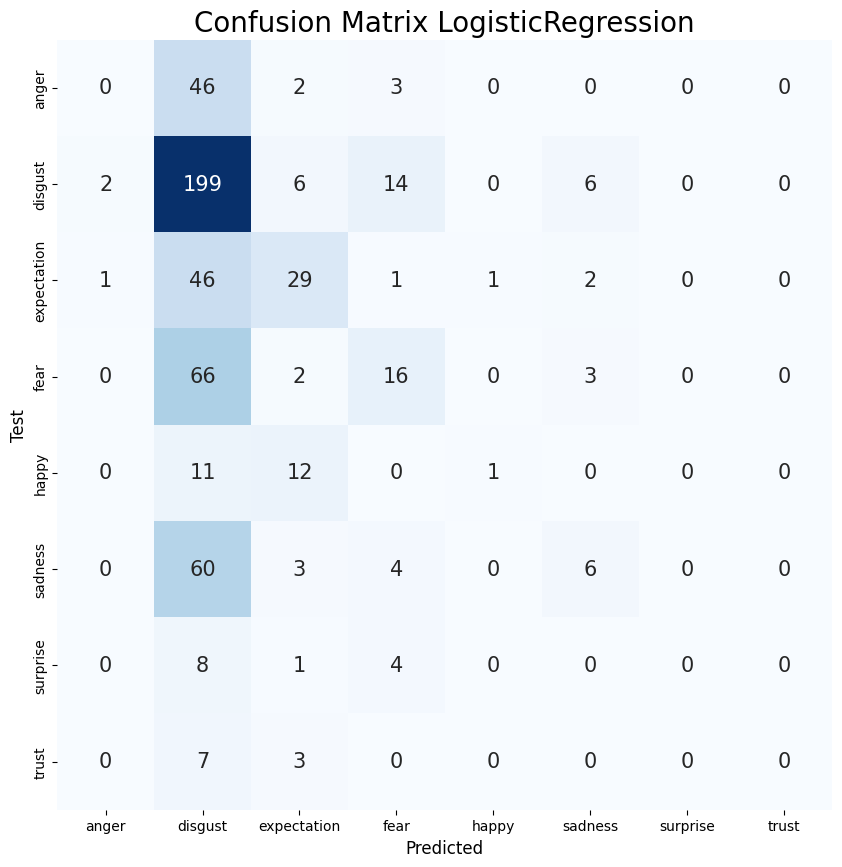

None

test_insample Classification Report LogisticRegression:

               precision    recall  f1-score   support

       anger       0.00      0.00      0.00         5
     disgust       0.23      0.88      0.36       102
 expectation       0.36      0.05      0.08       175
        fear       0.13      0.03      0.05       103
       happy       0.00      0.00      0.00         3
     sadness       0.16      0.06      0.08        53
    surprise       0.00      0.00      0.00        18
       trust       0.00      0.00      0.00         2

    accuracy                           0.23       461
   macro avg       0.11      0.13      0.07       461
weighted avg       0.24      0.23      0.13       461

	est_outsample Classification Report LogisticRegression:

               precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     disgust       0.66      0.91      0.77       145
 expectation       0.00      0.00      0.00        17
        f

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [78]:
test_insample_tf, Y_test_insample_tf ,labels= co_data(df_insample, False)
test_outsample_tf, Y_outsample_tf ,labels= co_data(df_outsample, False)

best_param = LR(x_train, x_test, y_train, y_test, labels, test_insample_tf,Y_test_insample_tf, test_outsample_tf, Y_outsample_tf)
print('Best parametrs: ', best_param)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Random Forest and SVC
Accuracy on train: 51.86%
Accuracy on test: 41.59%

Classification Report RFC SVC:

               precision    recall  f1-score   support

       anger       0.00      0.00      0.00        51
     disgust       0.44      0.92      0.60       227
 expectation       0.32      0.34      0.33        80
        fear       0.00      0.00      0.00        87
       happy       0.00      0.00      0.00        24
     sadness       0.00      0.00      0.00        73
    surprise       0.00      0.00      0.00        13
       trust       0.00      0.00      0.00        10

    accuracy                           0.42       565
   macro avg       0.09      0.16      0.12       565
weighted avg       0.22      0.42      0.29       565



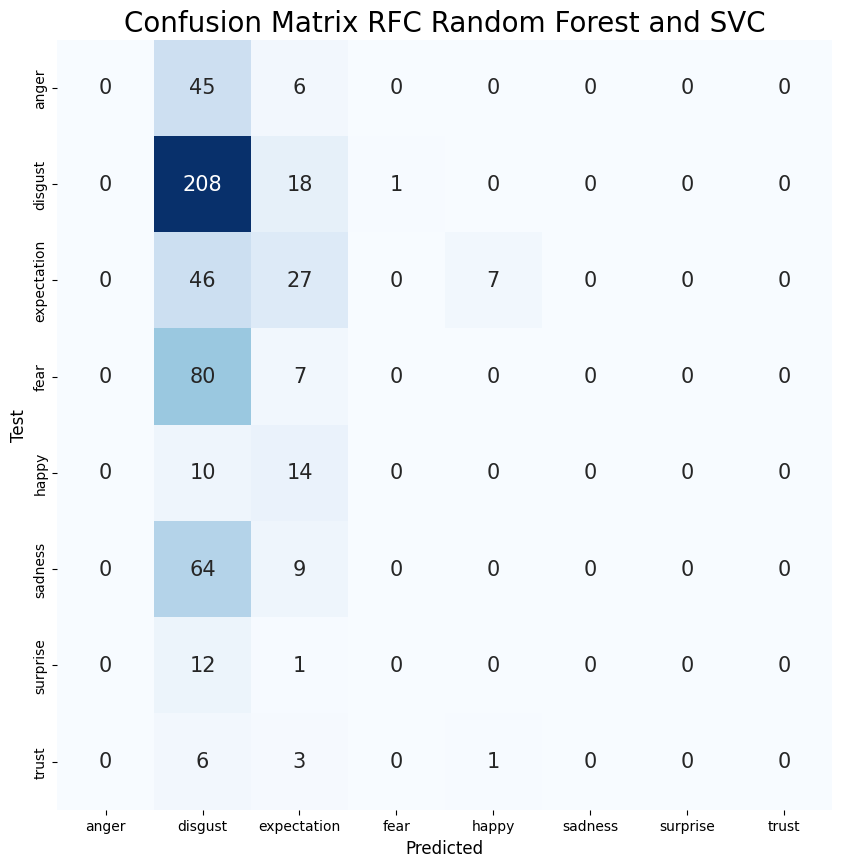

None

test_insample Classification Report RFC SVC:

               precision    recall  f1-score   support

       anger       0.00      0.00      0.00         5
     disgust       0.00      0.00      0.00       102
 expectation       0.00      0.00      0.00       175
        fear       0.31      0.04      0.07       103
       happy       0.00      0.00      0.00         3
     sadness       0.43      0.06      0.10        53
    surprise       0.04      0.89      0.08        18
       trust       0.00      0.00      0.00         2

    accuracy                           0.05       461
   macro avg       0.10      0.12      0.03       461
weighted avg       0.12      0.05      0.03       461

	est_outsample Classification Report RFC SVC:

               precision    recall  f1-score   support

       anger       0.12      0.11      0.11        19
     disgust       0.00      0.00      0.00       145
 expectation       0.00      0.00      0.00        17
        fear       0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [79]:
RFCSVC(x_train, x_test, y_train, y_test, labels, test_insample_tf,Y_test_insample_tf, test_outsample_tf, Y_outsample_tf)

In [ ]:
%%time

BATCH_SIZE = 16
MAX_LEN = 200
EPOCHS = 10
train_data_loader_clear, val_data_loader_clear = loader(x_train, y_train,x_test,y_test, MAX_LEN, BATCH_SIZE)
class_names = labels
print(class_names)
print(len(class_names))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_clear = getmodel(class_names, device, SentimentClassifier)
optimizer, scheduler, loss_fn = opsclo(model_clear, train_data_loader_clear,EPOCHS , device)
nametomodelclear = 'best_model_state_emotion_clear.bin' 
history_clear = train_model(EPOCHS,model_clear,train_data_loader_clear,val_data_loader_clear, loss_fn,optimizer,device, scheduler,x_train, x_test,nametomodelclear)

['anger' 'disgust' 'expectation' 'fear' 'happy' 'sadness' 'surprise'
 'trust']
8


Some weights of the model checkpoint at onlplab/alephbert-base were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
C:\ProgramData\Anaconda3\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Us

Epoch 1/10
----------
Train loss 1.7688189207668035 accuracy 0.39469026548672564
Val   loss 1.7335239781273737 accuracy 0.40176991150442476

Epoch 2/10
----------
Train loss 1.7446301184909445 accuracy 0.39601769911504425
Val   loss 1.7233209676212735 accuracy 0.40176991150442476

Epoch 3/10
----------
Train loss 1.735238258267792 accuracy 0.4013274336283186
Val   loss 1.7244340247578092 accuracy 0.40176991150442476

Epoch 4/10
----------
Train loss 1.7361344997311983 accuracy 0.3986725663716814
Val   loss 1.7212789456049602 accuracy 0.40176991150442476

Epoch 5/10
----------
Train loss 1.7326488402527822 accuracy 0.4013274336283186
Val   loss 1.7174605296717749 accuracy 0.40176991150442476

Epoch 6/10
----------
Train loss 1.7227155314364904 accuracy 0.40176991150442476
Val   loss 1.7112991081343756 accuracy 0.40176991150442476

Epoch 7/10
----------
Train loss 1.7223336268478715 accuracy 0.4026548672566372
Val   loss 1.7097016705407038 accuracy 0.40176991150442476

Epoch 8/10
-------

C:\Users\Naors\AppData\Local\Temp/ipykernel_9372/2306657669.py:2: DeprecationWarning: NotImplemented should not be used in a boolean context
  if history['train_acc'][0].device.__eq__('cuda:0'):


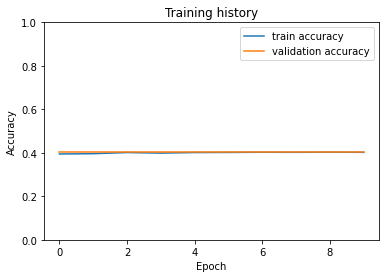

In [ ]:
plot(history_clear)

In [ ]:
model_clear.load_state_dict(torch.load(nametomodelclear))

<All keys matched successfully>

In [ ]:
df_insample_clean = df_insample.copy()
df_insample_clean['talkbacks'] = df_insample_clean['talkbacks'].apply(lambda x :  clean_content(x))

x_test_insample_clean, y_test_insample_clean, labels = co_data(df_insample_clean, False)
test_data_loader_insample_clear = create_data_loader(x_test_insample_clean,y_test_insample_clean, alephbert_tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
test_insample_clear_acc, test_insample_clear_loss = eval_model(model_clear, test_data_loader_insample_clear, loss_fn, device, len(x_test_insample_clean))
print(f'test insample loss {test_insample_clear_loss} accuracy {test_insample_clear_acc}')
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(model_clear,test_data_loader_insample_clear)
print('\nClassification Report test insample clean:\n\n',classification_report(y_test, y_pred, target_names=class_names))

C:\ProgramData\Anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


test insample loss 1.8956189402218522 accuracy 0.22125813449023862

Classification Report test insample clean:

               precision    recall  f1-score   support

       anger       0.00      0.00      0.00         5
     disgust       0.22      1.00      0.36       102
 expectation       0.00      0.00      0.00       175
        fear       0.00      0.00      0.00       103
       happy       0.00      0.00      0.00         3
     sadness       0.00      0.00      0.00        53
    surprise       0.00      0.00      0.00        18
       trust       0.00      0.00      0.00         2

    accuracy                           0.22       461
   macro avg       0.03      0.12      0.05       461
weighted avg       0.05      0.22      0.08       461



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df_outsample_clean = df_outsample.copy()
df_outsample_clean['talkbacks'] = df_outsample_clean['talkbacks'].apply(lambda x :  clean_content(x))

x_test_outsample_clean, y_test_outsample_clean, labels = co_data(df_outsample_clean, False)
test_data_loader_outsample_clear = create_data_loader(x_test_outsample_clean,y_test_outsample_clean, alephbert_tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
test_outsample_clear_acc, test_outsample_clear_loss = eval_model(model_clear, test_data_loader_outsample_clear, loss_fn, device, len(x_test_outsample_clean))
print(f'test insample loss {test_outsample_clear_loss} accuracy {test_outsample_clear_acc}')
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(model_clear,test_data_loader_outsample_clear)
print('\nClassification Report test outsample clean:\n\n',classification_report(y_test, y_pred, target_names=class_names))

C:\ProgramData\Anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


test insample loss 1.4648915018354143 accuracy 0.6712962962962963

Classification Report test outsample clean:

               precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     disgust       0.67      1.00      0.80       145
 expectation       0.00      0.00      0.00        17
        fear       0.00      0.00      0.00         4
       happy       0.00      0.00      0.00         6
     sadness       0.00      0.00      0.00        14
    surprise       0.00      0.00      0.00         1
       trust       0.00      0.00      0.00        10

    accuracy                           0.67       216
   macro avg       0.08      0.12      0.10       216
weighted avg       0.45      0.67      0.54       216



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
%%time

BATCH_SIZE = 16
MAX_LEN = 200
EPOCHS = 10
train_data_loader_clear, val_data_loader_clear = loader(x_train, y_train,x_test,y_test, MAX_LEN, BATCH_SIZE)
class_names = labels
print(class_names)
print(len(class_names))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_E_clear = getmodel(class_names, device, EmotionClassifier)
optimizer, scheduler, loss_fn = opsclo(model_E_clear, train_data_loader_clear,EPOCHS , device)
nametomodelclear = 'best_model_state_emotion_clear.bin' 
history_clear = train_model(EPOCHS,model_E_clear,train_data_loader_clear,val_data_loader_clear, loss_fn,optimizer,device, scheduler,x_train, x_test,nametomodelclear)
plot(history_clear)

['anger' 'disgust' 'expectation' 'fear' 'happy' 'sadness' 'surprise'
 'trust']
8


Some weights of the model checkpoint at onlplab/alephbert-base were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
C:\ProgramData\Anaconda3\lib\site-packages\transformers\optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Us

Epoch 1/10
----------
Train loss 1.7666539482667412 accuracy 0.3911504424778761
Val   loss 1.7153229647212558 accuracy 0.40176991150442476

Epoch 2/10
----------
Train loss 1.73734256835051 accuracy 0.4026548672566372
Val   loss 1.70864623453882 accuracy 0.40176991150442476

Epoch 3/10
----------
Train loss 1.7328146360289882 accuracy 0.40176991150442476
Val   loss 1.7078669601016574 accuracy 0.40176991150442476

Epoch 4/10
----------
Train loss 1.735888104203721 accuracy 0.4008849557522124
Val   loss 1.7086725036303203 accuracy 0.40176991150442476

Epoch 5/10
----------
Train loss 1.7353045780893783 accuracy 0.40221238938053094
Val   loss 1.7078173723485734 accuracy 0.40176991150442476

Epoch 6/10
----------
Train loss 1.725039114414806 accuracy 0.40176991150442476
Val   loss 1.7070448729727004 accuracy 0.40176991150442476

Epoch 7/10
----------
Train loss 1.734761848416127 accuracy 0.40221238938053094
Val   loss 1.7068169547451868 accuracy 0.40176991150442476

Epoch 8/10
----------
T

NameError: name 'history' is not defined

In [ ]:
model_E_clear.load_state_dict(torch.load(nametomodelclear))
test_insample_clear_acc, test_insample_clear_loss = eval_model(model_E_clear, test_data_loader_insample_clear, loss_fn, device, len(x_test_insample_clean))
print(f'test insample loss {test_insample_clear_loss} accuracy {test_insample_clear_acc}')
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(model_E_clear,test_data_loader_insample_clear)
print('\nClassification Report test insample clean:\n\n',classification_report(y_test, y_pred, target_names=class_names))
test_outsample_clear_acc, test_outsample_clear_loss = eval_model(model_E_clear, test_data_loader_outsample_clear, loss_fn, device, len(x_test_outsample_clean))
print(f'test insample loss {test_outsample_clear_loss} accuracy {test_outsample_clear_acc}')
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(model_E_clear,test_data_loader_outsample_clear)
print('\nClassification Report test outsample clean:\n\n',classification_report(y_test, y_pred, target_names=class_names))

test insample loss 1.8405635356903076 accuracy 0.22125813449023862


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\transformers


Classification Report test insample clean:

               precision    recall  f1-score   support

       anger       0.00      0.00      0.00         5
     disgust       0.22      1.00      0.36       102
 expectation       0.00      0.00      0.00       175
        fear       0.00      0.00      0.00       103
       happy       0.00      0.00      0.00         3
     sadness       0.00      0.00      0.00        53
    surprise       0.00      0.00      0.00        18
       trust       0.00      0.00      0.00         2

    accuracy                           0.22       461
   macro avg       0.03      0.12      0.05       461
weighted avg       0.05      0.22      0.08       461

test insample loss 1.4237841963768005 accuracy 0.6712962962962963

Classification Report test outsample clean:

               precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     disgust       0.67      1.00      0.80       145
 expectation       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
